In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
mnist


<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

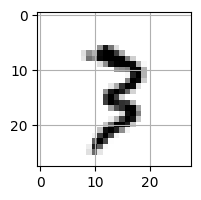

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[25000], cmap=plt.cm.binary)
plt.grid(True)
plt.show()

In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
train_images = train_images
test_images = test_images


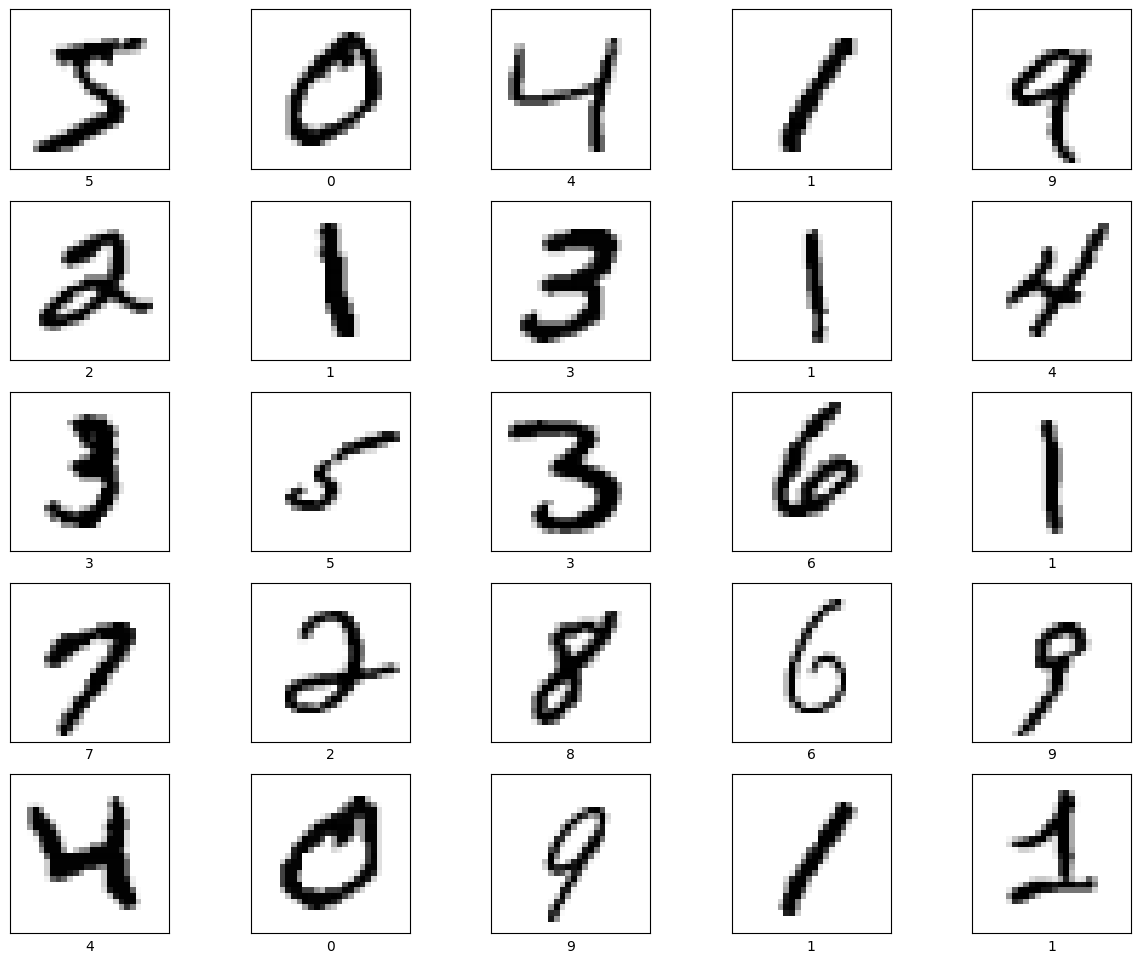

In [ ]:
# Define class_names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(15,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # Use the defined class_names to get the label for the image
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

In [ ]:
ann_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann_history = ann_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8119 - loss: 8.0307 - val_accuracy: 0.8803 - val_loss: 0.4943
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9013 - loss: 0.4467 - val_accuracy: 0.9106 - val_loss: 0.3735
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9271 - loss: 0.3039 - val_accuracy: 0.9331 - val_loss: 0.3192
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9371 - loss: 0.2549 - val_accuracy: 0.9265 - val_loss: 0.3257
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9415 - loss: 0.2319 - val_accuracy: 0.9418 - val_loss: 0.2754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9448 - loss: 0.2234 - val_accuracy: 0.9407 - val_loss: 0.3153
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9478 - loss: 0.2100 - val_accuracy: 0.9458 - val_loss: 0.2715
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9523 - loss: 0.1

In [ ]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9023 - loss: 1.0758 - val_accuracy: 0.9784 - val_loss: 0.0716
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9816 - loss: 0.0626 - val_accuracy: 0.9851 - val_loss: 0.0499
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9875 - loss: 0.0407 - val_accuracy: 0.9833 - val_loss: 0.0582
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9887 - loss: 0.0362 - val_accuracy: 0.9867 - val_loss: 0.0488
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9920 - loss: 0.0289 - val_accuracy: 0.9815 - val_loss: 0.0672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9923 - loss: 0.0265 - val_accuracy: 0.9830 - val_loss: 0.0660
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.9860 - val_loss: 0.0533
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9942 -

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

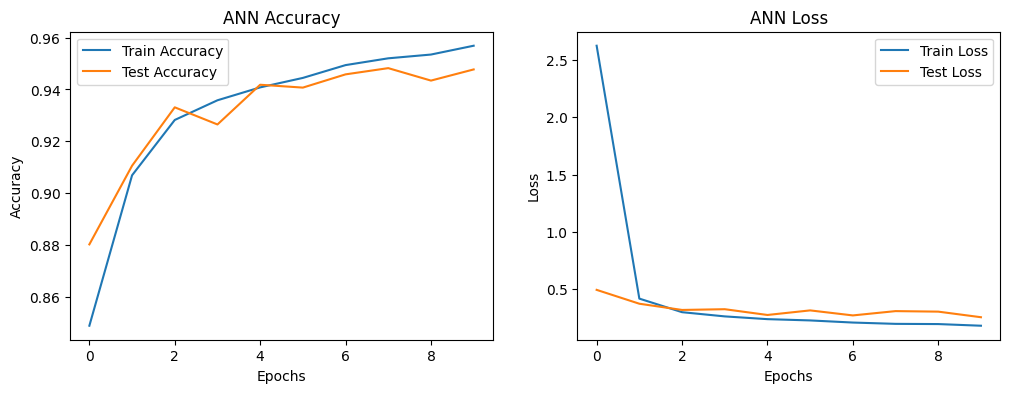

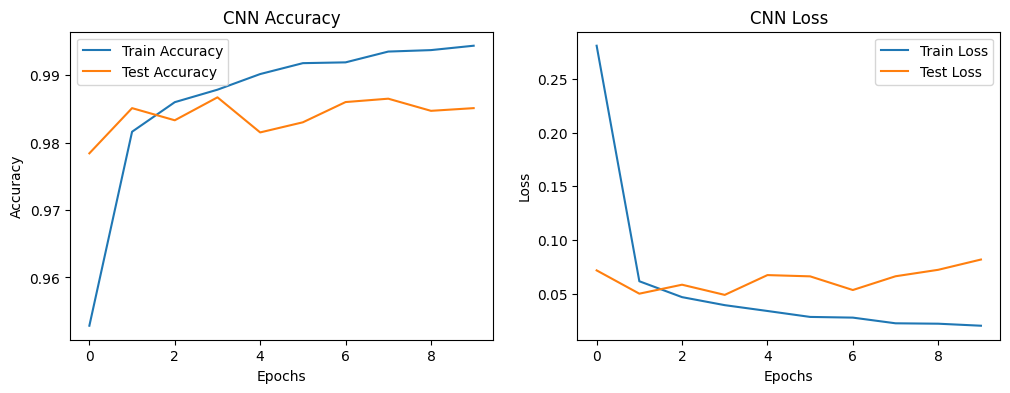

In [ ]:
plot_history(ann_history, "ANN")
plot_history(cnn_history, "CNN")

In [ ]:
ann_loss, ann_accuracy = ann_model.evaluate(test_images, test_labels)
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images_cnn, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.2746
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9807 - loss: 0.0996


In [ ]:
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

ANN Test Accuracy: 0.9477
CNN Test Accuracy: 0.9851
